# **ECG CLASSIFICATION**

**# Importing Libraries and Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv("/content/arrhythmia (1).csv")
df=data.copy()

## Basic information of data

In [ ]:
data.head()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [ ]:
data.shape

(452, 280)

In [ ]:
#Extracting column names to data frame
pd.DataFrame(data.columns,columns=["Features"])

,Features
0,age
1,sex
2,height
3,weight
4,QRSduration
...,...
275,chV6_PwaveAmp
276,chV6_TwaveAmp
277,chV6_QRSA
278,chV6_QRSTA


 **Calculate the total count of missing values in a DataFrame.**

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame

# Step 1: Create a DataFrame of Boolean values indicating missing values
missing_values_df = data.isnull()

# Step 2: Calculate the count of missing values for each column
missing_values_per_column = missing_values_df.sum()

# Step 3: Calculate the total count of missing values across all columns
total_missing_values = missing_values_per_column.sum()

print(f"Total missing values: {total_missing_values}")


Total missing values: 408


In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame

# Step 1: Calculate the count of missing values for each column
missing_values_per_column = data.isnull().sum()

# Step 2: Sort the missing values counts in descending order
sorted_missing_values = missing_values_per_column.sort_values(ascending=False)

print(sorted_missing_values)


J                             376
P                              22
T                               8
QRST                            1
heartrate                       1
                             ... 
chV2_RPwave                     0
chV2_SPwave                     0
chV2_intrinsicReflecttions      0
chV2_RRwaveExists               0
class                           0
Length: 280, dtype: int64


In [ ]:
data['class'] # get our last column

0       8
1       6
2      10
3       1
4       7
       ..
447     1
448    10
449     2
450     1
451     1
Name: class, Length: 452, dtype: int64

In [ ]:
sorted(data['class'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 15, 16]

In [ ]:
counts = {
    "value":[],
    "freq":[]
}

for i in data['class'].unique():
    counts['value'].append(i)
    counts['freq'].append(len(data[data['class'] ==  i]))

c = pd.DataFrame(counts)
sorted_c = c.sort_values(by="value")
print(sorted_c)

    value  freq
3       1   245
8       2    44
6       3    15
9       4    15
10      5    13
1       6    25
4       7     3
0       8     2
11      9     9
2      10    50
5      14     4
12     15     5
7      16    22


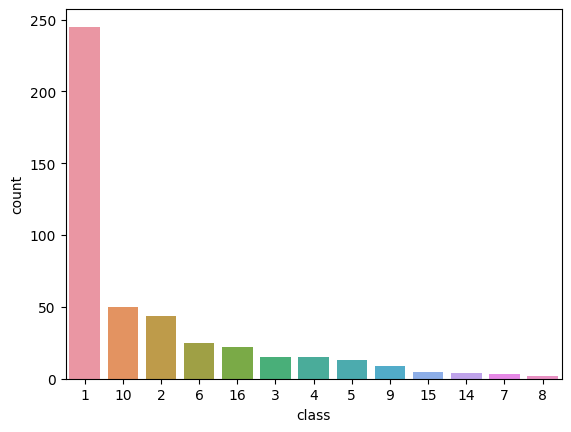

In [ ]:
sns.countplot(x='class', data=data, order=data['class'].value_counts().index)
plt.show()


**In multi-class problems, the dataset considered imbalanced because one or more classes represent a small fraction of the total instances compared to the others.**  The purpose of the count plot is to visualize the distribution of categories in the 'class' column. Each unique category value will have a corresponding bar on the plot, and the height of each bar represents the count of occurrences of that category in the DataFrame. This is a useful way to understand the distribution of classes and the balance between different categories in your data.






# **Preprocessing Step**

**Outliers detecion to clean and seprate the data**

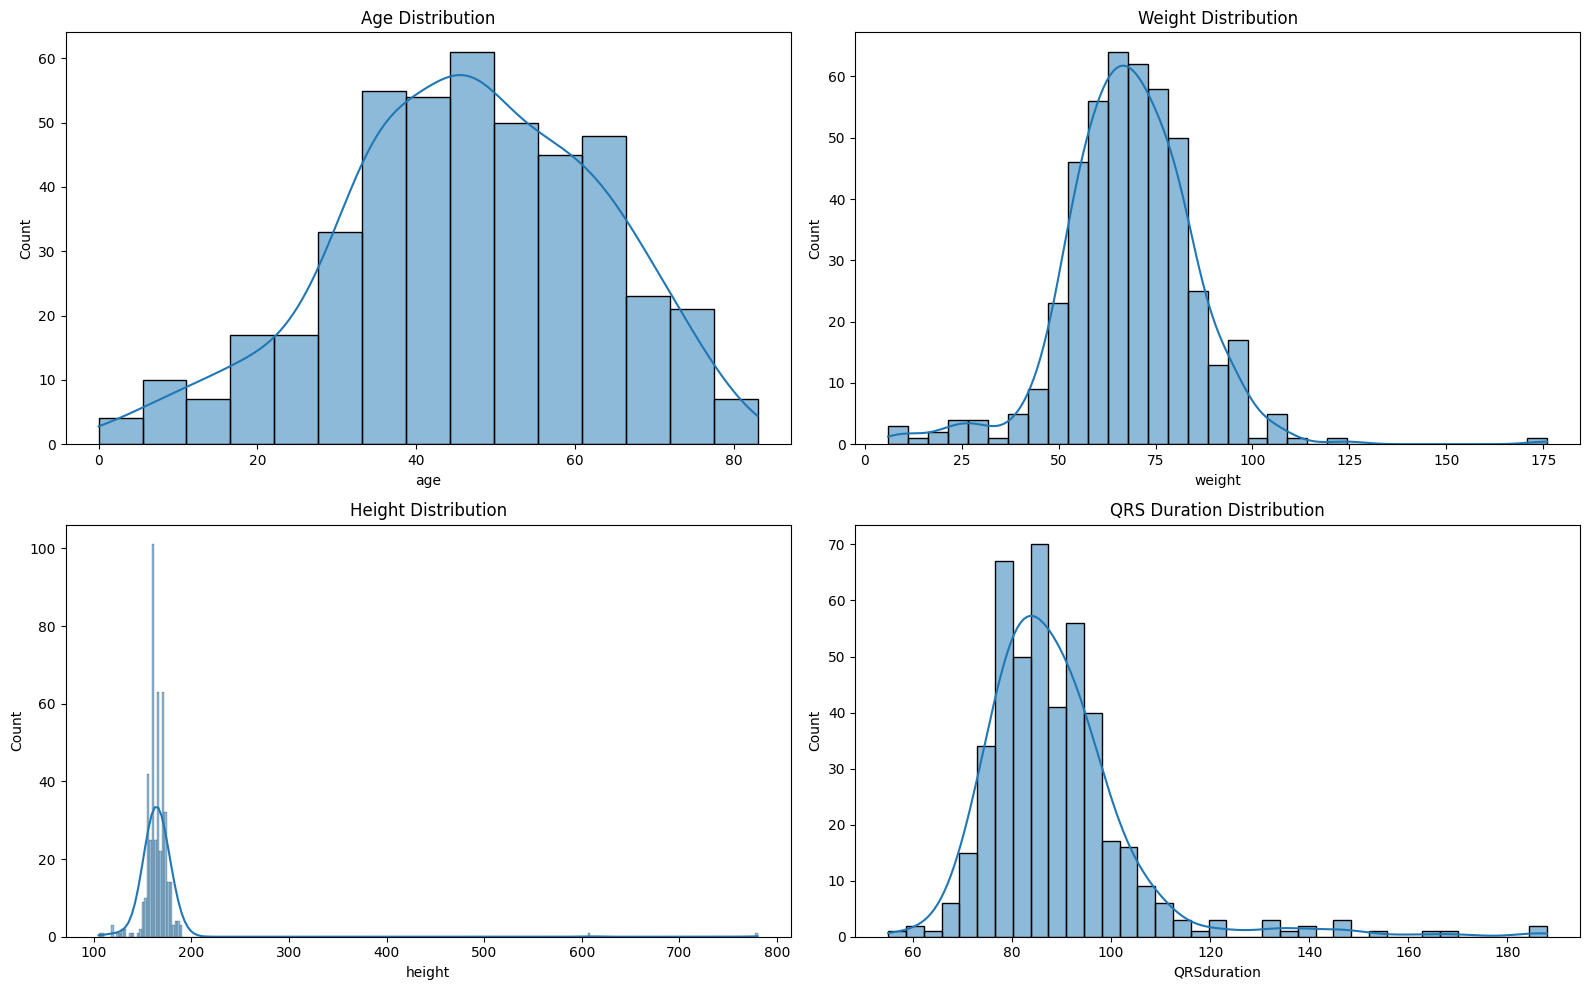

In [ ]:

plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.histplot(data['weight'], kde=True)
plt.title('Weight Distribution')

plt.subplot(2, 2, 3)
sns.histplot(data['height'], kde=True)
plt.title('Height Distribution')

plt.subplot(2, 2, 4)
sns.histplot(data['QRSduration'], kde=True)
plt.title('QRS Duration Distribution')

plt.tight_layout()
plt.show()

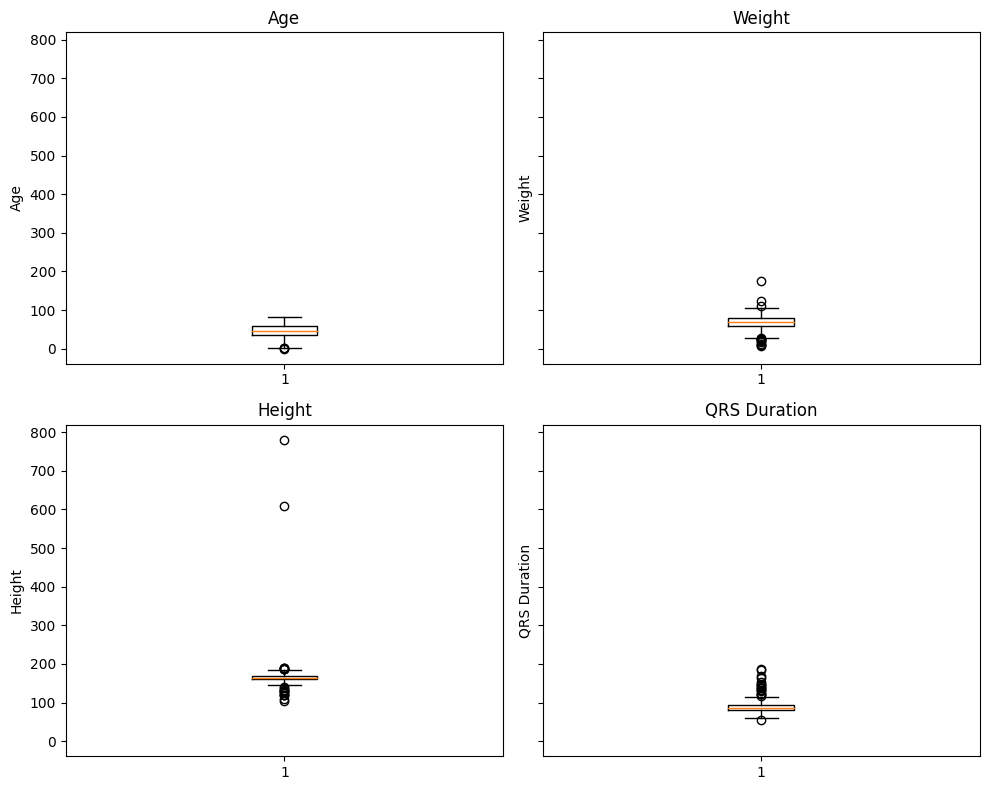

In [ ]:
# Create a figure and subplots with shared y-axis
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharey=True)

# Plot the data in each subplot
axs[0, 0].boxplot(data['age'])
axs[0, 0].set_title('Age')
axs[0, 0].set_ylabel('Age')  # Label on y-axis

axs[0, 1].boxplot(data['weight'])
axs[0, 1].set_title('Weight')
axs[0, 1].set_ylabel('Weight')  # Label on y-axis

axs[1, 0].boxplot(data['height'])
axs[1, 0].set_title('Height')
axs[1, 0].set_ylabel('Height')  # Label on y-axis

axs[1, 1].boxplot(data['QRSduration'])
axs[1, 1].set_title('QRS Duration')
axs[1, 1].set_ylabel('QRS Duration')  # Label on y-axis

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


In [ ]:
# Check for "?" values
question_mark_count = (data == "?").sum().sum()

# Check for "NA" values
na_count = data.isna().sum().sum()

# Print the results
if question_mark_count > 0:
    print("The dataset contains", question_mark_count, "occurrences of '?'.")

if na_count > 0:
    print("The dataset contains", na_count, "occurrences of 'NA'.")

if question_mark_count == 0 and na_count == 0:
    print("The dataset does not contain any '?' or 'NA' values.")

The dataset contains 408 occurrences of 'NA'.


In [ ]:
# Find the rows and columns with NA values
na_rows = data[data.isna().any(axis=1)]
na_columns = data.columns[data.isna().any()]

# Calculate the percentage of rows with NA values
percentage_na_rows = (len(na_rows) / len(data)) * 100

# Print information about NA values
if not na_columns.empty:
    print("Columns with NA values:")
    print(na_columns)

    print("\nRows with NA values:")
    if not na_rows.empty:
        print(na_rows.head())
        print(f"Total rows with NA values: {len(na_rows)} ({percentage_na_rows:.2f}% of total)")
    else:
        print("No rows with NA values.")


Columns with NA values:
Index(['T', 'P', 'QRST', 'J', 'heartrate'], dtype='object')

Rows with NA values:
   age  sex  height  weight  QRSduration  PRinterval  Q-Tinterval  Tinterval  \
0   75    0     190      80           91         193          371        174   
1   56    1     165      64           81         174          401        149   
3   55    0     175      94          100         202          380        179   
4   75    0     190      80           88         181          360        177   
5   13    0     169      51          100         167          321        174   

   Pinterval  QRS  ...  chV6_QwaveAmp  chV6_RwaveAmp  chV6_SwaveAmp  \
0        121  -16  ...            0.0            9.0           -0.9   
1         39   25  ...            0.0            8.5            0.0   
3        143   28  ...            0.0           12.2           -2.2   
4        103  -16  ...            0.0           13.1           -3.6   
5         91  107  ...           -0.6           12.2      

In [ ]:
# Define the specific columns you want to display
specific_columns = ['T', 'P', 'QRST', 'J', 'heartrate']

# Specify the range of rows you want to select
selected_rows_range = slice(350, 353)  # Rows 350 to 352

# Use iloc to select rows and specific columns
selected_data = data.loc[selected_rows_range, specific_columns]

# Display the selected data
print(selected_data)


         T     P  QRST      J  heartrate
350   64.0   NaN  26.0    NaN       63.0
351 -132.0 -60.0  24.0    NaN       65.0
352  113.0  74.0  65.0 -164.0       58.0
353   39.0  30.0 -12.0    NaN       73.0


**Replace NaN values using K-nearest neighbors**

In [ ]:
# Initialize KNN imputer
imputer = KNNImputer(n_neighbors=15)  # Specify the number of nearest neighbors

# Perform KNN imputation
X_imputed = imputer.fit_transform(data)
data_imputed_KNN = pd.DataFrame(X_imputed, columns=data.columns)
# Print the imputed dataset


In [ ]:
#show just 3 columns before replacing NaN
specific_columns = ['T', 'P', 'QRST', 'J', 'heartrate']
data_imputed_KNN[specific_columns].loc[350:352, specific_columns]
#data_imputed_MEAN[specific_columns].loc[350:352, specific_columns]


,T,P,QRST,J,heartrate
350,64.0,47.533333,26.0,-54.933333,63.0
351,-132.0,-60.000000,24.0,-66.000000,65.0
352,113.0,74.000000,65.0,-164.000000,58.0


In [ ]:
print("Data before preprocessing NaN:", data.shape)
print("Data after preprocessing NaN:", data_imputed_KNN.shape)
clean_data_Z = data_imputed_KNN.copy()

Data before preprocessing NaN: (452, 280)
Data after preprocessing NaN: (452, 280)


In [ ]:
clean_data_Z.describe()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


counting the hight of imputed data

In [ ]:
clean_data_Z['height'].value_counts().sort_index()



105.0     1
110.0     1
119.0     1
120.0     2
124.0     1
127.0     1
130.0     2
132.0     1
133.0     1
138.0     1
140.0     1
146.0     1
148.0     1
149.0     1
150.0     9
152.0     1
153.0     5
154.0     4
155.0    23
156.0    19
157.0    10
158.0     9
159.0     6
160.0    81
161.0     5
162.0    15
163.0    16
164.0     9
165.0    46
166.0     9
167.0     8
168.0    15
169.0     7
170.0    40
171.0     9
172.0    14
173.0     7
174.0     4
175.0    21
176.0    10
177.0     4
178.0     9
179.0     1
180.0     4
181.0     1
182.0     2
184.0     1
185.0     3
186.0     3
188.0     1
190.0     3
608.0     1
780.0     1
Name: height, dtype: int64

In [ ]:
#replace the values with logical values
clean_data_Z.loc[clean_data_Z["height"] == 780, "height"] = 78
clean_data_Z.loc[clean_data_Z["height"] == 608, "height"] = 60

# Applying PCA to reduce dimension of features

In [ ]:
labels = clean_data_Z["class"]

df = clean_data_Z.drop("class", axis=1)
df.shape

(452, 279)

In [ ]:
# Assuming df is your original DataFrame with 279 features
scaled_data = preprocessing.scale(df.T)
scaled_df = pd.DataFrame(scaled_data, index=df.columns)
# Print the first few rows of the scaled DataFrame
#(scaled_df.head())

transforming the sacle data to fitted pca model

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_df)
pca_data = pca.transform(scaled_df)

show the variance in plot

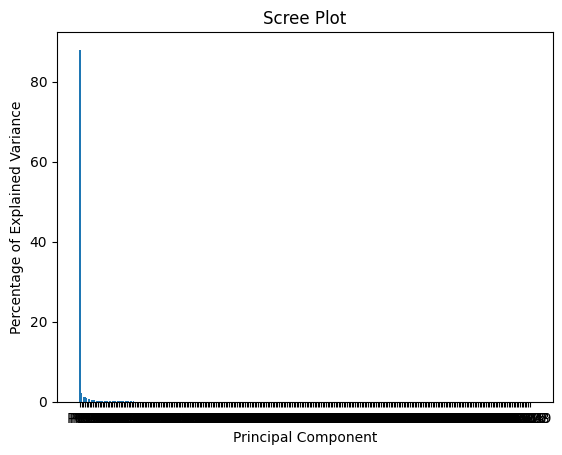

In [ ]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = [f"PC{x}" for x in range(1, len(per_var) + 1)]

plt.bar(range(1, len(per_var) + 1), per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.title("Scree Plot")
plt.show()


The number of components that explain about 96.00% of the variance: 42


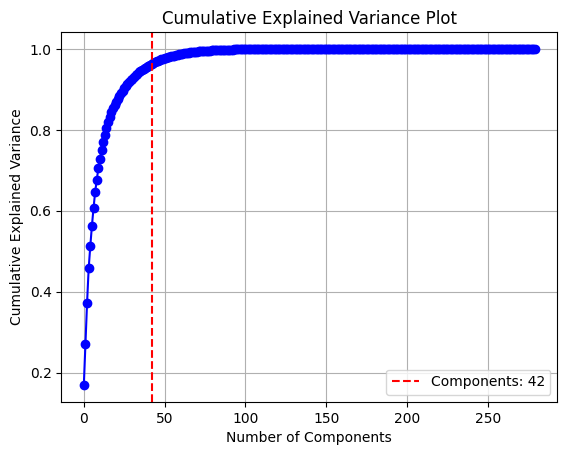

In [ ]:
# Assuming that clean_data_Z is your preprocessed data
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Fit PCA to the preprocessed data
pca = PCA()
pca.fit(clean_data_Z)

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain a specified amount of variance
target_explained_variance = 0.96
n_components = np.argmax(cumulative_explained_variance >= target_explained_variance) + 1

# Print the results
print(f"The number of components that explain about {target_explained_variance*100:.2f}% of the variance: {n_components}")

# Plot the cumulative explained variance
plt.figure()
plt.plot(cumulative_explained_variance, marker='o', linestyle='-', color='b')
plt.axvline(x=n_components, color='r', linestyle='--', label=f'Components: {n_components}')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.legend()
plt.grid()
plt.show()


Original dataset shape: (452, 280)
Transformed dataset shape: (452, 42)


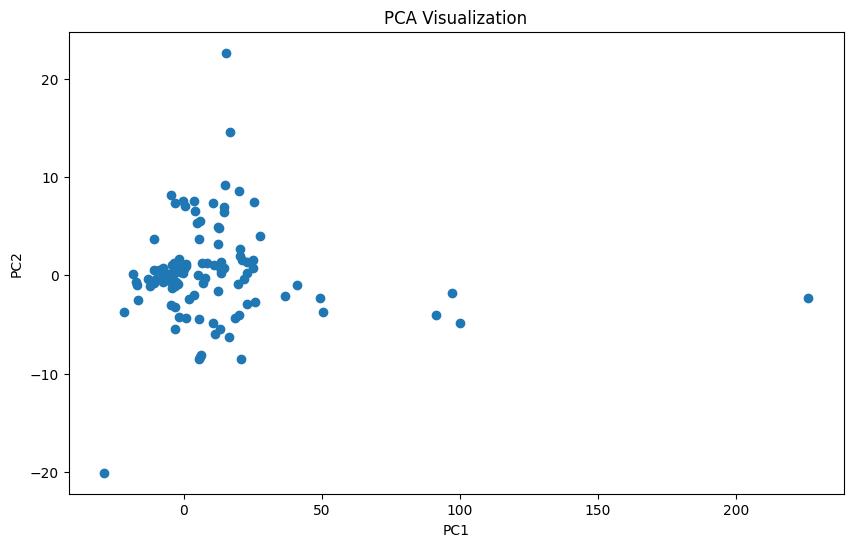

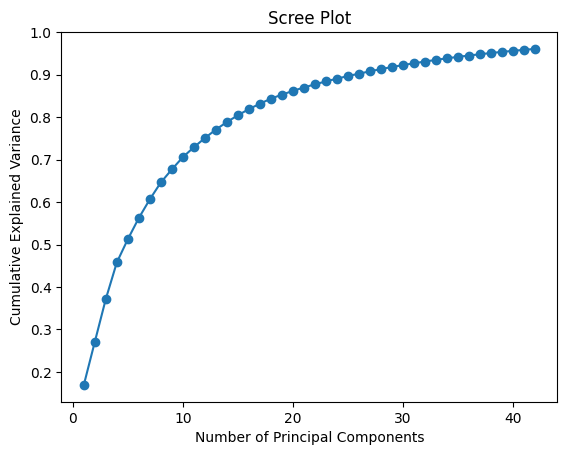

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load your dataset into a pandas DataFrame (assuming it's stored in 'df')
# Preprocess your data if necessary (e.g., handle missing values, scale features, etc.)


# Assuming clean_data_Z is your original dataset with 452 instances and 280 features
print("Original dataset shape:", clean_data_Z.shape)  # Expected output: (452, 280)

pca = PCA(n_components=42)
clean_data_Z_pca = pca.fit_transform(clean_data_Z)

print("Transformed dataset shape:", clean_data_Z_pca.shape)




# Dimensionality Reduction
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Interpretation of Principal Components
pclo = pca.components_.T  # Get the loadings of each feature on the principal components
#clean_data_Z_pca = pd.DataFrame(pclo, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])], index=clean_data_Z.columns)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1])  # Scatter plot of the data points in the reduced-dimensional space
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization')
plt.show()

# Visualize the explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()


In [ ]:
(clean_data_Z_pca.shape)

(452, 42)

----
----
----

# Split data

In [ ]:

# apply data after PCA reduction dimenstionality
df=clean_data_Z_pca.copy()
X = df
y = clean_data_Z['class']
y = clean_data_Z['class'].replace({1: 0, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 14: 1, 15: 1, 16: 1})



In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10, stratify=y)

# Print shapes of the resulting subsets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (339, 42)
X_test shape: (113, 42)
y_train shape: (339,)
y_test shape: (113,)


In [ ]:
print(f'Normal instances in test set: {sum(y_test==0)}')
print(f'Risk instances in test set: {sum(y_test==1)}')

Normal instances in test set: 61
Risk instances in test set: 52


# Bagging Approach#

> **Decision Tree Clasifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Number of base classifiers in the ensemble
n_estimators = 100

# Initialize a list to store base classifiers
base_classifiers = []

# Create base classifiers (Decision Trees) and rotate features
for i in range(n_estimators):
    # Randomly select a subset of features (you can customize this part)
    random_features = np.random.choice(X_train.shape[1], size=int(0.8*X_train.shape[1]), replace=False)
    X_rotated = X_train[:, random_features]

    # Create a Decision Tree classifier and fit it to the rotated features
    base_classifier = DecisionTreeClassifier(random_state=42)
    base_classifier.fit(X_rotated, y_train)

    # Append the trained classifier to the list
    base_classifiers.append((base_classifier, random_features))

# Predict labels on the test set using the ensemble
y_preds = []

for base_classifier, random_features in base_classifiers:
    X_test_rotated = X_test[:, random_features]
    y_pred = base_classifier.predict(X_test_rotated)
    y_preds.append(y_pred)

# Combine predictions using majority voting
y_pred_rotation_forest = np.round(np.mean(y_preds, axis=0))

# Evaluate the rotation forest ensemble
classification_rep = classification_report(y_test, y_pred_rotation_forest)
accuracy = accuracy_score(y_test, y_pred_rotation_forest)

# Print classification report and accuracy
print("Classification Report:\n", classification_rep)
print(f"Accuracy: {accuracy * 100:.2f}%")


Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.74      0.73        61
         1.0       0.68      0.65      0.67        52

    accuracy                           0.70       113
   macro avg       0.70      0.70      0.70       113
weighted avg       0.70      0.70      0.70       113

Accuracy: 69.91%


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Number of base classifiers in the ensemble
n_estimators = 100

# Initialize a list to store base classifiers
base_classifiers = []

# Create base classifiers (Decision Trees) and rotate features
for i in range(n_estimators):
    # Randomly select a subset of features (you can customize this part)
    random_features = np.random.choice(X_train.shape[1], size=int(0.8*X_train.shape[1]), replace=False)
    X_rotated = X_train[:, random_features]

    # Create a Decision Tree classifier and fit it to the rotated features
    base_classifier = DecisionTreeClassifier(random_state=42)
    base_classifier.fit(X_rotated, y_train)

    # Append the trained classifier to the list
    base_classifiers.append((base_classifier, random_features))

# Predict labels on the test set using the ensemble
y_preds = []

for base_classifier, random_features in base_classifiers:
    X_test_rotated = X_test[:, random_features]
    y_pred = base_classifier.predict(X_test_rotated)
    y_preds.append(y_pred)

# Combine predictions using majority voting
y_pred_rotation_forest = np.round(np.mean(y_preds, axis=0))

# Evaluate the rotation forest ensemble
classification_rep = classification_report(y_test, y_pred_rotation_forest)
accuracy = accuracy_score(y_test, y_pred_rotation_forest)

# Print classification report and accuracy
print("Classification Report:\n", classification_rep)
print(f"Accuracy: {accuracy * 100:.2f}%")


Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.74      0.74        61
         1.0       0.69      0.69      0.69        52

    accuracy                           0.72       113
   macro avg       0.72      0.72      0.72       113
weighted avg       0.72      0.72      0.72       113

Accuracy: 71.68%


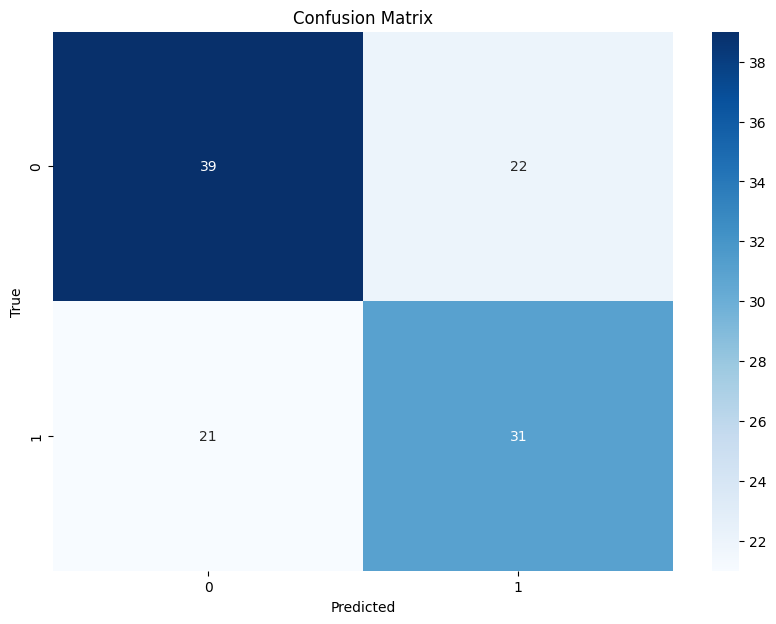

In [ ]:
# Predict labels using the Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_predicted = dt_clf.predict(X_test)

# Compute the confusion matrix
confusion_m = confusion_matrix(y_test, y_predicted)

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes for the heatmap
plt.figure(figsize=(10, 7))

# Create a heatmap of the confusion matrix with annotations
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='Blues')
# Set labels for the x and y axes
plt.xlabel('Predicted')
plt.ylabel('True')

# Set the title of the heatmap
plt.title('Confusion Matrix')

# Display the heatmap
plt.show()


> **SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Support Vector Machine (SVM) classifier
svm_clf = SVC(kernel='linear', C=1.0, random_state=42)

# Initialize a BaggingClassifier using the SVM classifier as the base estimator
bagging_svm = BaggingClassifier(
    estimator=svm_clf,
    n_estimators=10,
    max_samples=0.8,
    max_features=0.8,
    random_state=42
)

# Fit the SVM classifier to the training data
svm_clf.fit(X_train, y_train)

# Predict the labels of the test set using the SVM classifier
y_pred_svm = svm_clf.predict(X_test)

# Fit the BaggingClassifier with SVM base estimator to the training data
bagging_svm.fit(X_train, y_train)

# Predict the labels of the test set using the Bagging classifier
y_pred_bagging_svm = bagging_svm.predict(X_test)

# Evaluate the SVM classifier
print("Support Vector Machine (SVM) Classifier:")
classification_rep_svm = classification_report(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(classification_rep_svm)
print(f"Accuracy: {accuracy_svm * 100:.2f}%")

# Evaluate the BaggingClassifier with SVM base estimator
print("\nBagging Classifier with SVM base estimator:")
classification_rep_bagging_svm = classification_report(y_test, y_pred_bagging_svm)
accuracy_bagging_svm = accuracy_score(y_test, y_pred_bagging_svm)
print(classification_rep_bagging_svm)
print(f"Accuracy: {accuracy_bagging_svm * 100:.2f}%")


Support Vector Machine (SVM) Classifier:
              precision    recall  f1-score   support

         0.0       0.73      0.77      0.75        61
         1.0       0.71      0.67      0.69        52

    accuracy                           0.73       113
   macro avg       0.72      0.72      0.72       113
weighted avg       0.73      0.73      0.72       113

Accuracy: 72.57%

Bagging Classifier with SVM base estimator:
              precision    recall  f1-score   support

         0.0       0.72      0.77      0.75        61
         1.0       0.71      0.65      0.68        52

    accuracy                           0.72       113
   macro avg       0.72      0.71      0.71       113
weighted avg       0.72      0.72      0.72       113

Accuracy: 71.68%


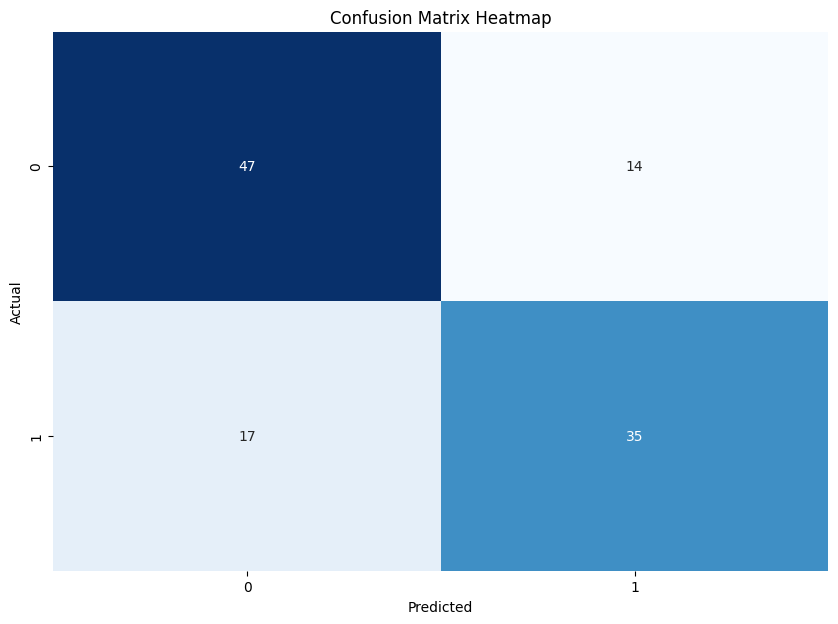

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

# Predict the labels of the test set using the SVM classifier
y_predicted = svm_clf.predict(X_test)

# Compute the confusion matrix
confusion_m = confusion_matrix(y_test, y_predicted)

# Plot the confusion matrix heatmap
plt.figure(figsize=(10, 7))
sn.heatmap(confusion_m, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


> **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Gaussian Naive Bayes classifier
nb_clf = GaussianNB()

# Initialize a BaggingClassifier using the Gaussian Naive Bayes classifier as the base estimator
bagging_nb = BaggingClassifier(
    estimator=nb_clf,
    n_estimators=100,
    max_samples=0.8,
    max_features=0.8,
    random_state=42
)

# Fit the Gaussian Naive Bayes classifier to the training data
nb_clf.fit(X_train, y_train)

# Predict the labels of the test set using the Naive Bayes classifier
y_pred_nb = nb_clf.predict(X_test)

# Fit the BaggingClassifier to the training data
bagging_nb.fit(X_train, y_train)

# Predict the labels of the test set using the Bagging classifier with Naive Bayes base estimator
y_pred_bagging_nb = bagging_nb.predict(X_test)

# Evaluate the Gaussian Naive Bayes classifier
print("Gaussian Naive Bayes Classifier:")
print(classification_report(y_test, y_pred_nb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)*100:.2f}%")

# Evaluate the BaggingClassifier with Naive Bayes base estimator
print("\nBagging Classifier with Naive Bayes base estimator:")
print(classification_report(y_test, y_pred_bagging_nb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_bagging_nb)*100:.2f}%")


Gaussian Naive Bayes Classifier:
              precision    recall  f1-score   support

         0.0       0.71      0.84      0.77        61
         1.0       0.76      0.60      0.67        52

    accuracy                           0.73       113
   macro avg       0.73      0.72      0.72       113
weighted avg       0.73      0.73      0.72       113

Accuracy: 72.57%

Bagging Classifier with Naive Bayes base estimator:
              precision    recall  f1-score   support

         0.0       0.74      0.82      0.78        61
         1.0       0.76      0.65      0.70        52

    accuracy                           0.74       113
   macro avg       0.75      0.74      0.74       113
weighted avg       0.74      0.74      0.74       113

Accuracy: 74.34%


Text(95.72222222222221, 0.5, 'Truth')

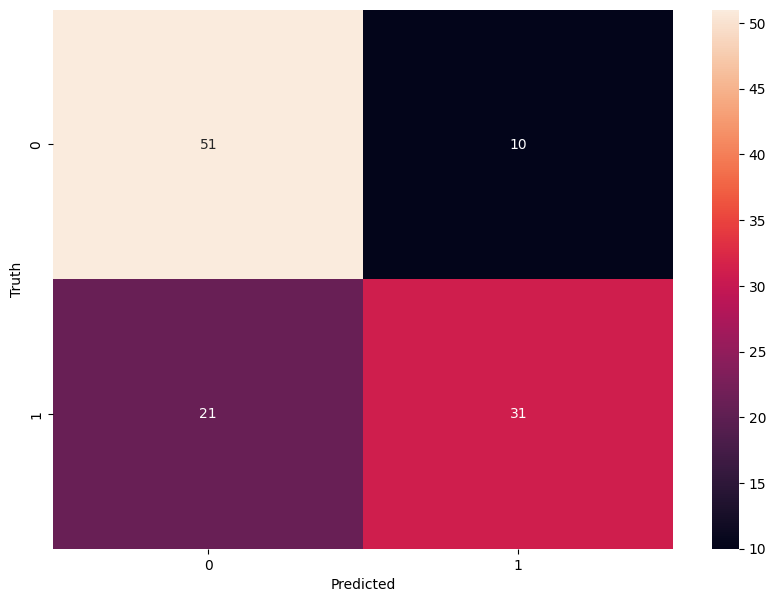

In [ ]:
y_predicted = nb_clf.predict(X_test)
confusion_m = confusion_matrix(y_test, y_predicted)

plt.figure(figsize= (10,7))
sn.heatmap (confusion_m, annot=True)
plt.xlabel('Predicted')
plt.ylabel( 'Truth')


> **Gradient boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the GradientBoostingClassifier with default parameters
gb_clf = GradientBoostingClassifier(random_state=42)

# Initialize a BaggingClassifier using the GradientBoostingClassifier as the base estimator
bagging_gb = BaggingClassifier(
    estimator=gb_clf,
    n_estimators=100,
    max_samples=0.8,
    max_features=0.8,
    random_state=42
)

# Fit the GradientBoostingClassifier to the training data
gb_clf.fit(X_train, y_train)

# Predict the labels of the test set using the Gradient Boosting classifier
y_pred_gb = gb_clf.predict(X_test)

# Fit the BaggingClassifier to the training data
bagging_gb.fit(X_train, y_train)

# Predict the labels of the test set using the Bagging classifier
y_pred_bagging = bagging_gb.predict(X_test)

# Evaluate the GradientBoostingClassifier
print("Gradient Boosting Classifier:")
classification_rep_gb = classification_report(y_test, y_pred_gb)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(classification_rep_gb)
print(f"Accuracy: {accuracy_gb*100:.2f}%")

# Evaluate the BaggingClassifier with GradientBoosting base estimator
print("\nBagging Classifier with GradientBoosting base estimator:")
classification_rep_bagging = classification_report(y_test, y_pred_bagging)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(classification_rep_bagging)
print(f"Accuracy: {accuracy_bagging*100:.2f}%")


Gradient Boosting Classifier:
              precision    recall  f1-score   support

         0.0       0.72      0.79      0.75        61
         1.0       0.72      0.63      0.67        52

    accuracy                           0.72       113
   macro avg       0.72      0.71      0.71       113
weighted avg       0.72      0.72      0.71       113

Accuracy: 71.68%

Bagging Classifier with GradientBoosting base estimator:
              precision    recall  f1-score   support

         0.0       0.71      0.77      0.74        61
         1.0       0.70      0.63      0.67        52

    accuracy                           0.71       113
   macro avg       0.71      0.70      0.70       113
weighted avg       0.71      0.71      0.71       113

Accuracy: 70.80%


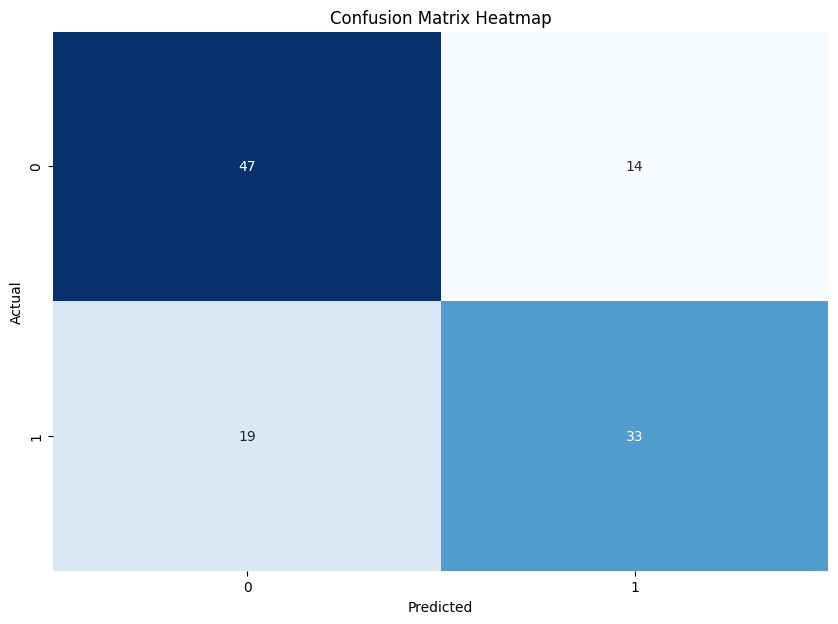

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

# Predict the labels of the test set using the BaggingClassifier with KNeighborsClassifier base estimator
y_predicted = bagging_gb.predict(X_test)

# Compute the confusion matrix
confusion_m = confusion_matrix(y_test, y_predicted)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 7))
sn.heatmap(confusion_m, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


> **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the RandomForestClassifier with default parameters
rf_clf = RandomForestClassifier(random_state=42)

# Initialize a BaggingClassifier using the RandomForestClassifier as the base estimator
bagging_rf = BaggingClassifier(
    estimator=rf_clf,
    n_estimators=20,
    max_samples=0.8,
    max_features=0.8,
    random_state=42
)

# Fit the RandomForestClassifier to the training data
rf_clf.fit(X_train, y_train)

# Predict the labels of the test set using the Random Forest classifier
y_pred_rf = rf_clf.predict(X_test)

# Fit the BaggingClassifier to the training data
bagging_rf.fit(X_train, y_train)

# Predict the labels of the test set using the Bagging classifier
y_pred_bagging = bagging_rf.predict(X_test)

# Evaluate the RandomForestClassifier
print("Random Forest Classifier:")
classification_rep_rf = classification_report(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(classification_rep_rf)
print(f"Accuracy: {accuracy_rf*100:.2f}%")

# Evaluate the BaggingClassifier with RandomForest base estimator
print("\nBagging Classifier with RandomForest base estimator:")
classification_rep_bagging = classification_report(y_test, y_pred_bagging)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(classification_rep_bagging)
print(f"Accuracy: {accuracy_bagging*100:.2f}%")


Random Forest Classifier:
              precision    recall  f1-score   support

         0.0       0.71      0.69      0.70        61
         1.0       0.65      0.67      0.66        52

    accuracy                           0.68       113
   macro avg       0.68      0.68      0.68       113
weighted avg       0.68      0.68      0.68       113

Accuracy: 68.14%

Bagging Classifier with RandomForest base estimator:
              precision    recall  f1-score   support

         0.0       0.70      0.77      0.73        61
         1.0       0.70      0.62      0.65        52

    accuracy                           0.70       113
   macro avg       0.70      0.69      0.69       113
weighted avg       0.70      0.70      0.70       113

Accuracy: 69.91%


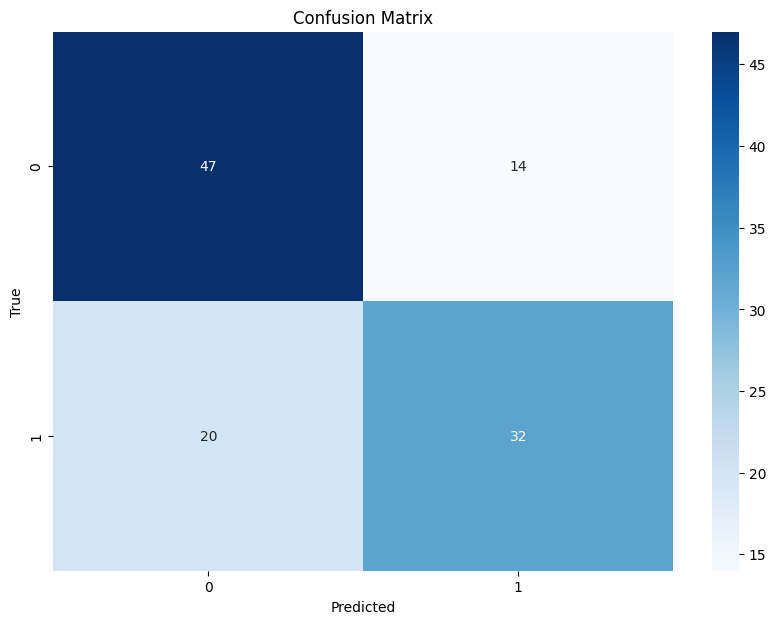

In [ ]:
y_predicted = bagging_rf.predict(X_test)
confusion_m = confusion_matrix(y_test, y_predicted)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 7))
sn.heatmap(confusion_m, annot=True, fmt='d', cmap='Blues')  # 'd' format for integer values
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Load or prepare your dataset
# X, y = ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base classifier (Random Forest)
random_forest = RandomForestClassifier(random_state=42)

# Initialize the BaggingClassifier with the Random Forest base estimator
bagging_random_forest = BaggingClassifier(
    base_estimator=random_forest,  # Use Random Forest as the base estimator
    n_estimators=100,             # Number of base estimators in the ensemble
    random_state=42               # Set a random seed for reproducibility
)

# Fit the BaggingClassifier with Random Forest base estimator to the training data
bagging_random_forest.fit(X_train, y_train)

# Predict the labels of the test set using the Bagging classifier
y_pred_random_forest = bagging_random_forest.predict(X_test)

# Obtain class probabilities using predict_proba
y_proba_random_forest = bagging_random_forest.predict_proba(X_test)

# Evaluate the BaggingClassifier with Random Forest base estimator
print("Bagging Classifier with Random Forest base estimator:")
print(classification_report(y_test, y_pred_random_forest))  # Print classification report with precision, recall, F1-score, etc.
print(f"Accuracy: {accuracy_score(y_test, y_pred_random_forest)*100:.2f}%")  # Print accuracy as a percentage


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Classifier with Random Forest base estimator:
              precision    recall  f1-score   support

         0.0       0.67      0.86      0.75        44
         1.0       0.82      0.60      0.69        47

    accuracy                           0.73        91
   macro avg       0.75      0.73      0.72        91
weighted avg       0.75      0.73      0.72        91

Accuracy: 72.53%


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
import numpy as np


# Decision Tree with Platt Scaling for Class Probabilities
calibrated_dt = CalibratedClassifierCV(base_estimator=dt_clf, method='sigmoid')
calibrated_dt.fit(X_train, y_train)
dt_class_probs = calibrated_dt.predict_proba(X_test)

# Support Vector Machine (SVM) with Platt Scaling
calibrated_svc = CalibratedClassifierCV(base_estimator=svm_clf, method='sigmoid')
calibrated_svc.fit(X_train, y_train)
svm_class_probs = calibrated_svc.predict_proba(X_test)

# Naive Bayes (Gaussian Naive Bayes)
nb_class_probs = nb_clf.predict_proba(X_test)

# Gradient Boosting (GradientBoostingClassifier)
gb_class_probs = gb_clf.predict_proba(X_test)

# Random Forest (RandomForestClassifier)
rf_class_probs = rf_clf.predict_proba(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


> **Evaluate Model**

In [ ]:
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

vanilla_mean_scores = []  # resulted from individuals
bagging_mean_scores = []  # from bagging
accuracy_scores = []

# Create classifiers
dtc = DecisionTreeClassifier()
svm_rbf = SVC(probability=True)  # Use SVC with probability=True for Platt scaling
nb = NaiveBayesClassifier()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
clf_array = [dtc, svm_rbf, nb, gb, rf]  # Classifiers in the desired sequence

for clf in clf_array:
    vanilla_scores = cross_val_score(clf, X, y, cv=10, n_jobs=-1)

    # Create a calibrated version of the SVM classifier with Platt scaling
    if clf == svm_rbf:
        calibrated_svm = CalibratedClassifierCV(base_estimator=clf, method='sigmoid')
        bagging_clf = BaggingClassifier(calibrated_svm, max_samples=0.7, max_features=20, n_estimators=42, random_state=42)
    else:
        bagging_clf = BaggingClassifier(clf, max_samples=0.7, max_features=20, n_estimators=42, random_state=42)

    bagging_scores = cross_val_score(bagging_clf, X, y, cv=10, n_jobs=-1)
    vanilla_mean_scores.append(vanilla_scores.mean())
    bagging_mean_scores.append(bagging_scores.mean())
    print("Mean of: {1:.3f}, std: (+/-) {2:.3f} [{0}]".format(clf.__class__.__name__, vanilla_scores.mean(),
                                                               vanilla_scores.std()))
    print("Mean of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n".format(clf.__class__.__name__, bagging_scores.mean(),
                                                                         bagging_scores.std()))

# Let’s Vote!
eclf = VotingClassifier(estimators=[
    ('Decision Tree Classifier', dtc),
    ('Support Vector Classification (Calibrated)', calibrated_svm),  # Use calibrated SVM
    ('Naive Bayes', nb),
    ('Gradient Boosting', gb),
    ('Random Forest', rf)],
    voting='hard')

for clf, label in zip([dtc, calibrated_svm, nb, gb, rf],  # Use calibrated SVM
                      ['Decision Tree Classifier', 'Support Vector Classification (Calibrated)', 'Naive Bayes', 'Gradient Boosting', 'Random Forest', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    accuracy_scores.append(scores.mean())
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Mean of: 0.641, std: (+/-) 0.072 [DecisionTreeClassifier]
Mean of: 0.734, std: (+/-) 0.043 [Bagging DecisionTreeClassifier]

Mean of: 0.772, std: (+/-) 0.045 [SVC]
Mean of: 0.750, std: (+/-) 0.051 [Bagging SVC]

Mean of: 0.737, std: (+/-) 0.054 [GaussianNB]
Mean of: 0.726, std: (+/-) 0.066 [Bagging GaussianNB]

Mean of: 0.755, std: (+/-) 0.066 [GradientBoostingClassifier]
Mean of: 0.759, std: (+/-) 0.047 [Bagging GradientBoostingClassifier]

Mean of: 0.768, std: (+/-) 0.046 [RandomForestClassifier]
Mean of: 0.761, std: (+/-) 0.062 [Bagging RandomForestClassifier]

Accuracy: 0.68 (+/- 0.06) [Decision Tree Classifier]


/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:32

Accuracy: 0.78 (+/- 0.04) [Support Vector Classification (Calibrated)]
Accuracy: 0.74 (+/- 0.05) [Naive Bayes]
Accuracy: 0.75 (+/- 0.06) [Gradient Boosting]
Accuracy: 0.76 (+/- 0.06) [Random Forest]


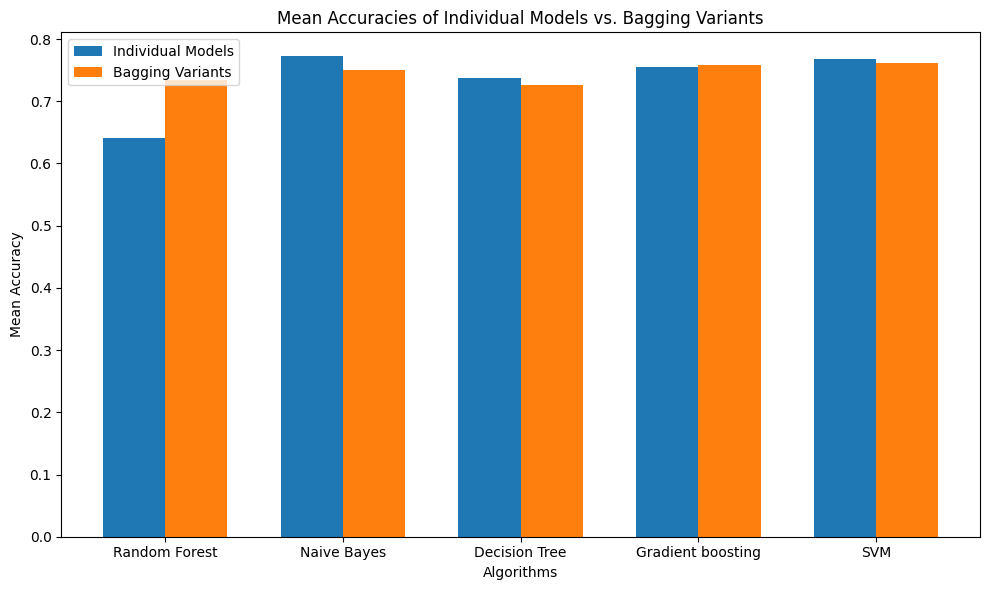

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Labels for the models
models = ['Random Forest', 'Naive Bayes', 'Decision Tree', 'Gradient boosting', 'SVM']

# Set the width of the bars
bar_width = 0.35

# Positions of the bars on the x-axis
index = np.arange(len(models))

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, vanilla_mean_scores, bar_width, label='Individual Models')
bar2 = ax.bar(index + bar_width, bagging_mean_scores, bar_width, label='Bagging Variants')

# Adding labels, titles, and ticks
ax.set_xlabel('Algorithms')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Mean Accuracies of Individual Models vs. Bagging Variants')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

# Displaying the chart
plt.tight_layout()
plt.show()




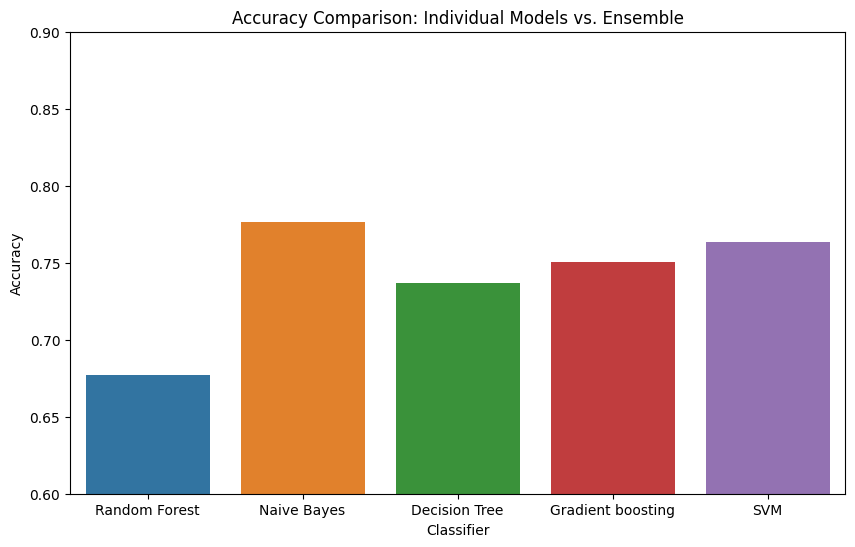

In [ ]:

# Names of the classifiers
classifiers = ['Random Forest', 'Naive Bayes', 'Decision Tree', 'Gradient boosting', 'SVM' ]

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=classifiers, y=accuracy_scores)
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison: Individual Models vs. Ensemble")
plt.ylim(0.6, 0.9)
plt.show()

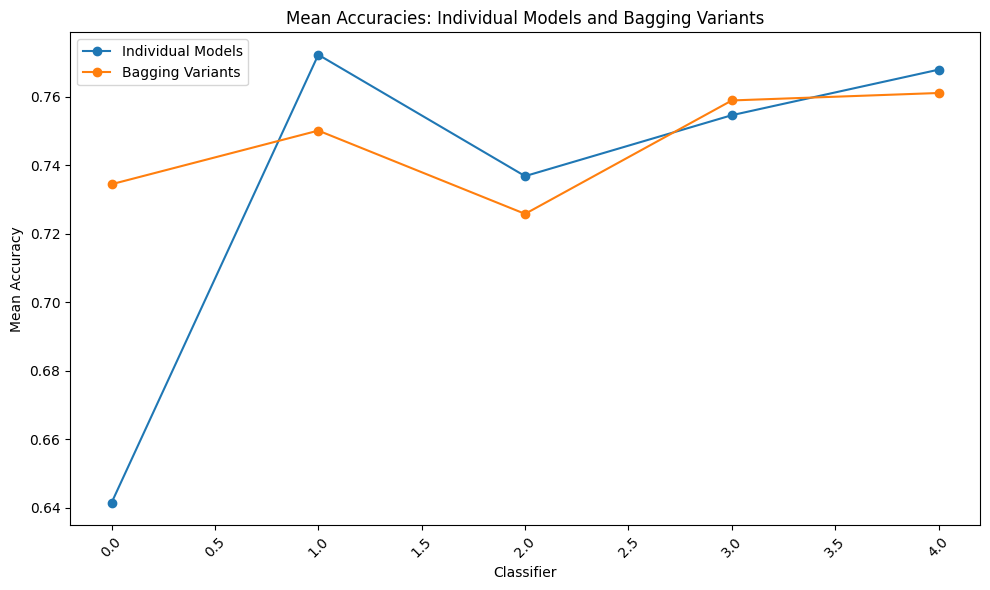

In [ ]:
import matplotlib.pyplot as plt

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot( vanilla_mean_scores, marker='o', label='Individual Models')
plt.plot( bagging_mean_scores, marker='o', label='Bagging Variants')
plt.xlabel("Classifier")
plt.ylabel("Mean Accuracy")
plt.title("Mean Accuracies: Individual Models and Bagging Variants")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



**Comparison Across Classifiers**

The results show the mean accuracy and standard deviation of accuracy for various classifiers and their corresponding bagging versions. Here's a comparison of these results:

1. **DecisionTreeClassifier** vs. **Bagging DecisionTreeClassifier**:
   - DecisionTreeClassifier: Mean accuracy of 0.641 with a standard deviation of 0.072.
   - Bagging DecisionTreeClassifier: Higher mean accuracy of 0.734 with a lower standard deviation of 0.043. Bagging improves the performance.

2. **SVC** vs. **Bagging SVC**:
   - SVC: Mean accuracy of 0.772 with a standard deviation of 0.045.
   - Bagging SVC: Slightly lower mean accuracy of 0.750 with a slightly higher standard deviation of 0.051. Bagging has a minor impact on performance in this case.

3. **GaussianNB** vs. **Bagging GaussianNB**:
   - GaussianNB: Mean accuracy of 0.737 with a standard deviation of 0.054.
   - Bagging GaussianNB: Slightly lower mean accuracy of 0.726 with a higher standard deviation of 0.066. Bagging has a minor negative impact on performance.

4. **GradientBoostingClassifier** vs. **Bagging GradientBoostingClassifier**:
   - GradientBoostingClassifier: Mean accuracy of 0.755 with a standard deviation of 0.066.
   - Bagging GradientBoostingClassifier: Slightly higher mean accuracy of 0.759 with a lower standard deviation of 0.047. Bagging improves the performance.

5. **RandomForestClassifier** vs. **Bagging RandomForestClassifier**:
   - RandomForestClassifier: Mean accuracy of 0.768 with a standard deviation of 0.046.
   - Bagging RandomForestClassifier: Slightly lower mean accuracy of 0.761 with a higher standard deviation of 0.062. Bagging has a minor negative impact on performance.

In summary, the impact of bagging varies for different classifiers. For DecisionTreeClassifier, GradientBoostingClassifier, and SVC, bagging improves performance, resulting in higher mean accuracy and lower variance. For GaussianNB and RandomForestClassifier, bagging has a minor negative impact on performance, with slightly lower mean accuracy and higher variance. The choice of whether to use bagging depends on the specific classifier and dataset characteristics.


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import recall_score, f1_score

# Create a list of classifiers
classifiers = [
    RandomForestClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
    GradientBoostingClassifier(),
    SVC()
]

# Iterate over the classifiers
for classifier in classifiers:
    # Create and train the Bagging classifier
    bagging_classifier = BaggingClassifier(estimator=classifier, n_estimators=10, random_state=42)
    bagging_classifier.fit(X_train, y_train)

    # Make predictions using the Bagging classifier
    y_pred = bagging_classifier.predict(X_test)

    # Calculate recall and F1-score
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the results
    print(f"Classifier: {classifier.__class__.__name__}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-score: {f1:.3f}")
    print("---------------------------------------")


Classifier: RandomForestClassifier
Recall: 0.638
F1-score: 0.723
---------------------------------------
Classifier: GaussianNB
Recall: 0.660
F1-score: 0.738
---------------------------------------
Classifier: DecisionTreeClassifier
Recall: 0.426
F1-score: 0.519
---------------------------------------
Classifier: GradientBoostingClassifier
Recall: 0.574
F1-score: 0.667
---------------------------------------
Classifier: SVC
Recall: 0.553
F1-score: 0.675
---------------------------------------


GaussianNB has the highest recall (0.660) and F1-score (0.738), indicating better performance in correctly identifying positive cases and achieving a balance between precision and recall.

RandomForestClassifier follows closely with a recall of 0.638 and an F1-score of 0.723.

GradientBoostingClassifier has a moderate recall of 0.574 and an F1-score of 0.667.

SVC has a recall of 0.553 and an F1-score of 0.675, showing a slightly lower performance than the previous classifiers.

DecisionTreeClassifier has the lowest recall (0.426) and F1-score (0.519), indicating that it may be struggling to correctly classify positive cases compared to the other classifiers.


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report
from prettytable import PrettyTable

# Create a list of classifiers
classifiers = [
    RandomForestClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
    GradientBoostingClassifier(),
    SVC()
]

# Create a PrettyTable instance
table = PrettyTable()
table.field_names = ["Classifier", "Precision", "Recall", "F1-score", "Support"]

# Iterate over the classifiers
for classifier in classifiers:
    # Create and train the Bagging classifier
    bagging_classifier = BaggingClassifier(estimator=classifier, n_estimators=10, random_state=42)
    bagging_classifier.fit(X_train, y_train)

    # Make predictions using the Bagging classifier
    y_pred = bagging_classifier.predict(X_test)

    # Generate the classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Add row to the table
    table.add_row([
        classifier.__class__.__name__,
        f"{report['weighted avg']['precision']:.3f}",
        f"{report['weighted avg']['recall']:.3f}",
        f"{report['weighted avg']['f1-score']:.3f}",
        report['weighted avg']['support']
    ])

# Print the table
print(table)


+----------------------------+-----------+--------+----------+---------+
|         Classifier         | Precision | Recall | F1-score | Support |
+----------------------------+-----------+--------+----------+---------+
|   RandomForestClassifier   |   0.764   | 0.747  |  0.745   |    91   |
|         GaussianNB         |   0.773   | 0.758  |  0.756   |    91   |
|   DecisionTreeClassifier   |   0.614   | 0.593  |  0.581   |    91   |
| GradientBoostingClassifier |   0.724   | 0.703  |  0.699   |    91   |
|            SVC             |   0.765   | 0.725  |  0.717   |    91   |
+----------------------------+-----------+--------+----------+---------+


----

# Boosting Technique

Boosting models try to reduce bias, unlike bagging models which aim to reduce variance.

> **AdaBoost**

In [67]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
# Create a list to store the accuracy scores
accuracy_table = []
accuracy_scores =[]

In [70]:
# Create the base classifier
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create a list to store the boosting classifiers
boosting_classifiers = []


# Perform sequential boosting
for i in range(15):
    boosting_classifier = AdaBoostClassifier(estimator=base_classifier, n_estimators=i+1, random_state=1)
    boosting_classifiers.append(boosting_classifier)
    scores = cross_val_score(boosting_classifier, X, y, cv=10)
    accuracy_table.append(scores.mean())

# Print the accuracy scores for each boosting iteration
for i, score in enumerate(accuracy_table):
    print(f"Boosting Iteration {i+1}: Accuracy = {score}")



# Find the index of the highest accuracy score
max_accuracy_index = accuracy_table.index(max(accuracy_table))
# Append the highest accuracy score to the accuracy_scores list
accuracy_scores.append(accuracy_table[max_accuracy_index])



Boosting Iteration 1: Accuracy = 0.5508212560386474
Boosting Iteration 2: Accuracy = 0.5597584541062801
Boosting Iteration 3: Accuracy = 0.6327536231884059
Boosting Iteration 4: Accuracy = 0.6395169082125605
Boosting Iteration 5: Accuracy = 0.6949758454106281
Boosting Iteration 6: Accuracy = 0.7014492753623188
Boosting Iteration 7: Accuracy = 0.7280676328502416
Boosting Iteration 8: Accuracy = 0.7191304347826086
Boosting Iteration 9: Accuracy = 0.7346376811594203
Boosting Iteration 10: Accuracy = 0.7479710144927536
Boosting Iteration 11: Accuracy = 0.7436231884057971
Boosting Iteration 12: Accuracy = 0.7612077294685989
Boosting Iteration 13: Accuracy = 0.7568599033816424
Boosting Iteration 14: Accuracy = 0.752415458937198
Boosting Iteration 15: Accuracy = 0.7545893719806763
Boosting Iteration 16: Accuracy = 0.5508212560386474
Boosting Iteration 17: Accuracy = 0.5597584541062801
Boosting Iteration 18: Accuracy = 0.6327536231884059
Boosting Iteration 19: Accuracy = 0.6395169082125605
Boo

> **XGBoost**

In [73]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [74]:
# Create the XGBoost classifier
xgb_classifier = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Perform cross-validation
scores = cross_val_score(xgb_classifier, X, y, cv=10)
accuracy_scores.append(scores.mean())
# Print the mean accuracy score
print("Mean Accuracy: {:.3f}".format(scores.mean()*100))


Mean Accuracy: 75.242


> **LightGBM**

In [75]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

In [76]:
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report

# Create the LightGBM classifier
lgb_classifier = LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Perform cross-validation
scores = cross_val_score(lgb_classifier, X, y, cv=10)
accuracy_scores.append(scores.mean())
# Print the mean accuracy score
print("Mean Accuracy: {:.3f}".format(scores.mean()*100))


[LightGBM] [Info] Number of positive: 186, number of negative: 220
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5698
[LightGBM] [Info] Number of data points in the train set: 406, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.458128 -> initscore=-0.167881
[LightGBM] [Info] Start training from score -0.167881
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [77]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, recall_score, f1_score

# Create the boosting models
boosting_models = [AdaBoostClassifier(), GradientBoostingClassifier(), LGBMClassifier(), XGBClassifier()]  # Replace with your actual models

# Define the scoring metrics (recall and F1-score)
scoring = {'recall': make_scorer(recall_score), 'f1_score': make_scorer(f1_score)}

# Evaluate the models using cross-validation
for model in boosting_models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=scoring)
    mean_recall = cv_results['test_recall'].mean()
    mean_f1_score = cv_results['test_f1_score'].mean()
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Recall: {mean_recall:.3f}") #sum of true positives
    print(f"Mean F1-score: {mean_f1_score:.3f}")
    print("---------------------------------------")


Model: AdaBoostClassifier
Mean Recall: 0.715
Mean F1-score: 0.722
---------------------------------------
Model: GradientBoostingClassifier
Mean Recall: 0.672
Mean F1-score: 0.712
---------------------------------------
[LightGBM] [Info] Number of positive: 186, number of negative: 220
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5698
[LightGBM] [Info] Number of data points in the train set: 406, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.458128 -> initscore=-0.167881
[LightGBM] [Info] Start training from score -0.167881
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

**AdaboostClassifier appears to be the best-performing model among the evaluated boosting models.**

------
------